# Facial Emotion Data Wrangling 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import dataframe from previous EDA step
df = pd.read_csv("df_1.csv")

In [3]:
# Function that inputs a series of numerical strings separated
# by a " " and returns a numpy array 

def convert_to_numpy(x):
   
    pixel_arr = []
    
    # convert string to a list of strings
    pixels_list=x.str.split(' ')

    for _ in pixels_list:
        pixel_arr.append(pd.to_numeric(_))

    pixels_num = np.array(pixel_arr)

    return pixels_num

the square root of 2304 is 48, so the pixels need to be reshapped into 48 X 48 using the reshape method

drop group 1

So the training dataset is unbalanced in regards to the 1 and 3 categories. These need to be rebalanced using some translation, etc of the data that is avalaible.

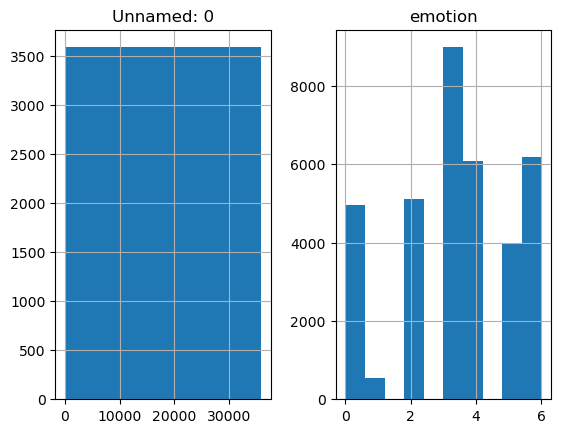

In [4]:
df.hist();

In [5]:
df.describe()

,Unnamed: 0,emotion
count,35887.000000,35887.000000
mean,17943.000000,3.323265
std,10359.828892,1.873819
min,0.000000,0.000000
25%,8971.500000,2.000000
50%,17943.000000,3.000000
75%,26914.500000,5.000000
max,35886.000000,6.000000


In [6]:
df['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

the label 1 needs to be dropped since there are not that many training examples

In [7]:
df.head()

,Unnamed: 0,emotion,Usage,pixels
0,0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [8]:
df['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [9]:
# drop the one category
df = df[df['emotion'] != 1].copy()

In [10]:
df['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
Name: emotion, dtype: int64

need to remap the emotion categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)

 to (0=Angry, 1=Fear, 2=Happy, 3=Sad, 4=Surprise, 5=Neutral)


In [11]:
dic_replace = {2:1, 3:2, 4:3, 5:4, 6:5}

df['emotion'].replace(dic_replace, inplace=True)

need to remap the emotion categories (0=Angry, 1=Disgust, 1=Fear, 2=Happy, 3=Sad, 4=Surprise, 6=Neutral)

In [12]:
df['emotion'].value_counts()

2    8989
5    6198
3    6077
1    5121
0    4953
4    4002
Name: emotion, dtype: int64

## Training Data 

In [13]:
train_df = df.loc[df[' Usage'] == 'Training']

In [14]:
train_df

,Unnamed: 0,emotion,Usage,pixels
0,0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,1,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,3,3,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,4,5,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...,...,...
28704,28704,1,Training,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...
28705,28705,0,Training,114 112 113 113 111 111 112 113 115 113 114 11...
28706,28706,3,Training,74 81 87 89 95 100 98 93 105 120 127 133 146 1...
28707,28707,0,Training,222 227 203 90 86 90 84 77 94 87 99 119 134 14...


In [15]:
train_df = train_df.drop([' Usage'], axis=1)

if we drop this row we need to recode the categorize so for now we will leave it

In [16]:
train_df.head()

,Unnamed: 0,emotion,pixels
0,0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,1,231 212 156 164 174 138 161 173 182 200 106 38...
3,3,3,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,4,5,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


### Validation Data

In [17]:
valid_df = df.loc[df[' Usage'] == 'PrivateTest']

In [18]:
valid_df = valid_df.drop(' Usage', axis=1)

In [19]:
valid_df.head()

,Unnamed: 0,emotion,pixels
32298,32298,0,170 118 101 88 88 75 78 82 66 74 68 59 63 64 6...
32299,32299,4,7 5 8 6 7 3 2 6 5 4 4 5 7 5 5 5 6 7 7 7 10 10 ...
32300,32300,5,232 240 241 239 237 235 246 117 24 24 22 13 12...
32301,32301,3,200 197 149 139 156 89 111 58 62 95 113 117 11...
32302,32302,1,40 28 33 56 45 33 31 78 152 194 200 186 196 20...


### Test Data

In [20]:
test_df = df.loc[df[' Usage'] == 'PublicTest']
test_df = test_df.drop(' Usage', axis=1)
test_df.head()

,Unnamed: 0,emotion,pixels
28709,28709,0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
28711,28711,3,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
28712,28712,5,205 203 236 157 83 158 120 116 94 86 155 180 2...
28713,28713,2,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...
28714,28714,2,235 233 223 109 34 37 34 31 28 38 56 69 106 13...


In [21]:
# Save cleaned data_frames 
train_df.to_csv("train_df.csv")
valid_df.to_csv("valid_df.csv")
test_df.to_csv("test_df.csv")